# 이미지 처리 기초

여기에서는 이미지 데이터를 표현하는 방식과 이미지 데이터를 처리하기 위한 파이썬 패키지인 Pillow, Scikit-Image, OpenCV 패키지에 대해 설명한다.

## 픽셀

이미지 데이터는 픽셀(pixel)이라고 하는 작은 이미지를 직사각형 형태로 모은 것이다. 각 픽셀은 단색의 직사각형이다. 전체 이미지의 크기를 표현할 때는 (***세로픽셀수 x 가로픽셀수***) 형식으로 표현한다. 

이미지 데이터를 저장할 때는 픽셀의 색을 표현하는 스칼라 값이나 벡터를 2차원 배열로 표현한다. 파이썬에서는 NumPy의 `ndarray` 클래스 배열로 표현한다. 

## 색공간

픽셀의 색을 숫자로 표현하는 방식을 색공간(color space)라고 한다. 대표적인 색공간으로는 그레이스케일(gray scale), RGB(Red-Green-Blue), HSV(Hue-Saturation-Value) 방식이 있다.

### 그레이스케일

그레이스케일에서는 모든 색이 흑백이다. 각 픽셀은 명도를 나타내는 숫자로 표현된다. 0은 검은색을 나타내고 숫자가 커질수록 명도가 증가하여 하얀색이 된다. 숫자는 보통 0~255의 8비트 부호없는 정수로 저장된다.

SciPy 패키지의 misc 서브 패지의 `face` 명령은 이미지 처리용 샘플 이미지를 제공한다. 인수로 `gray=True`를 입력하면 그레이스케일 이미지를 반환한다. 이미지의 크기는 배열의 `shape` 속성으로 볼 수 있다. 

In [29]:
import scipy as sp

img_gray = sp.misc.face(gray=True)
img_gray.shape

(768, 1024)

In [30]:
sp.misc.face(gray=True)

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

이 이미지 데이터는 768x1024 크기의 uint8 자료형 2차원 배열이다. 좌측 상단의 25개 픽셀의 데이터만 보면 다음과 같다.

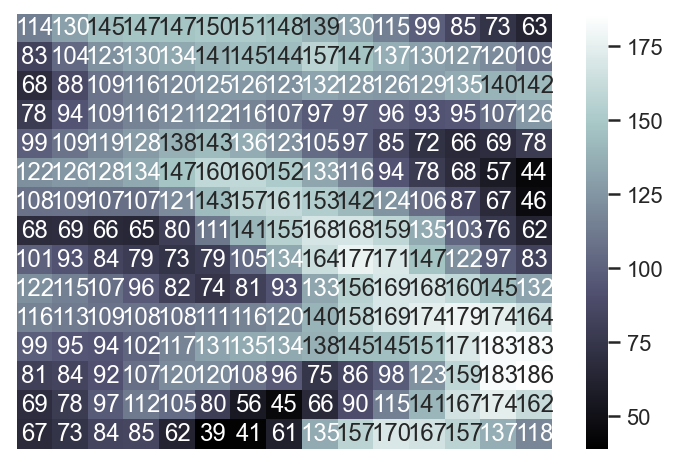

In [2]:
import matplotlib.pylab as plt
import seaborn as sns

sns.heatmap(img_gray[:15, :15], annot=True, fmt="d", cmap=plt.cm.bone)
plt.axis("off")
plt.show()

### RGB

RGB 색공간에서 색은 적(Red), 녹(Green), 청(Blue)의 3가지 색의 명도를 뜻하는 숫자 3개가 합쳐진 벡터로 표현된다. 8비트 부호없는 정수를 사용하는 경우 (255, 0, 0)은 빨간색, (0, 255, 0)은 녹색, (0, 0, 255)는 파란색이다. 

픽셀 데이터가 스칼라가 아닌 벡터이므로 이미지 데이터는 (세로픽셀수 x 가로픽셀수) 형태의 2차원 배열로 표현하지 못하고 (세로픽셀수 x 가로픽셀수 x 색채널) 형태의 3차원 배열로 저장한다. 세번째 축을 색채널(channel)이라고 부른다. 

하나의 픽셀 표현하는데, 숫자 3개가 필요해. 행렬을 3개를 만들게 되는 것. 각각이 해당 자리의 픽셀의 R/G/B값을 나타내는 행렬이 되겠지. <br>이렇게 행렬에서 한차원 더 나간것을 `tensor`라고 한다. <br>
tensor를 표시할때 방식이, 
`3xNxM or NxMx3` 둘다 자주 쓰인다.

![1_36.png](./materials/1_36.png)

In [31]:
from sklearn.datasets import load_sample_images

dataset = load_sample_images()   
img_rgb = dataset.images[1]
img_rgb.shape

(427, 640, 3)

다음 그림에서 붉은 기와는 R채널의 값이 크고 하늘은 푸른색이므로 B채널의 값이 큰 것을 확인할 수 있다.

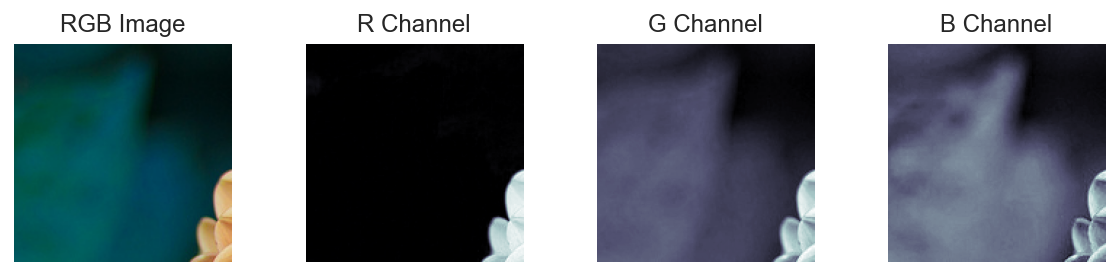

In [32]:
plt.figure(figsize=(10, 2))

plt.subplot(141)
plt.imshow(img_rgb[50:200, 50:200, :])
plt.axis("off")
plt.title("RGB Image")

plt.subplot(142)
plt.imshow(img_rgb[50:200, 50:200, 0], cmap=plt.cm.bone)
plt.axis("off")
plt.title("R Channel")

plt.subplot(143)
plt.imshow(img_rgb[50:200, 50:200, 1], cmap=plt.cm.bone)
plt.axis("off")
plt.title("G Channel")

plt.subplot(144)
plt.imshow(img_rgb[50:200, 50:200, 2], cmap=plt.cm.bone)
plt.axis("off")
plt.title("B Channel")

plt.show()

RGB가 가장 기본이긴 하지만, 아래같은 방식들도 있다.

### HSV

색을 스칼라 하나로 표현. 빛의 파장, 가시광선 스펙트럼의 주파수로 표현한다.

HSV(Hue, Saturation, Value) 색공간에서는 색이 다음 세가지 값으로 표현된다.

* 색상(Hue): 색상값 H는 가시광선 스펙트럼을 주파수 별로 고리모양으로 배치했을 때의 각도이다. 0°~360°의 범위를 갖고 360°와 0°는 빨강을 가리킨다.
* 채도(Saturation): 채도값 S는 특정한 색상의 진함의 정도를 나타낸다. 가장 진한 상태를 100%이고 0%는 같은 명도의 무채색이다.
* 명도(Value): 명도값 V는 밝은 정도를 나타낸다. 순수한 흰색, 빨간색은 100%이고 검은색은 0%이다.
     
아래 코드는 채도가 100일 때의 색공간을 시각화 한 것이다.

In [6]:
from matplotlib.colors import hsv_to_rgb

V, H = np.mgrid[0:1:100j, 0:1:360j]
S = np.ones_like(V)

HSV_S100 = np.dstack((H, S * 1.0, V))
RGB_S100 = hsv_to_rgb(HSV_S100)
HSV_S20 = np.dstack((H, S * 0.2, V))
RGB_S20 = hsv_to_rgb(HSV_S20)

HSV_S20.shape

(100, 360, 3)

In [7]:
# 색상(Hue)
HSV_S20[:4, :5, 0]

array([[0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206],
       [0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206],
       [0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206],
       [0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206]])

In [8]:
# 채도(Saturation)
HSV_S20[:4, :5, 1]

array([[0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2]])

In [9]:
# 명도(Value)
HSV_S20[:4, :5, 2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.01010101, 0.01010101, 0.01010101, 0.01010101, 0.01010101],
       [0.02020202, 0.02020202, 0.02020202, 0.02020202, 0.02020202],
       [0.03030303, 0.03030303, 0.03030303, 0.03030303, 0.03030303]])

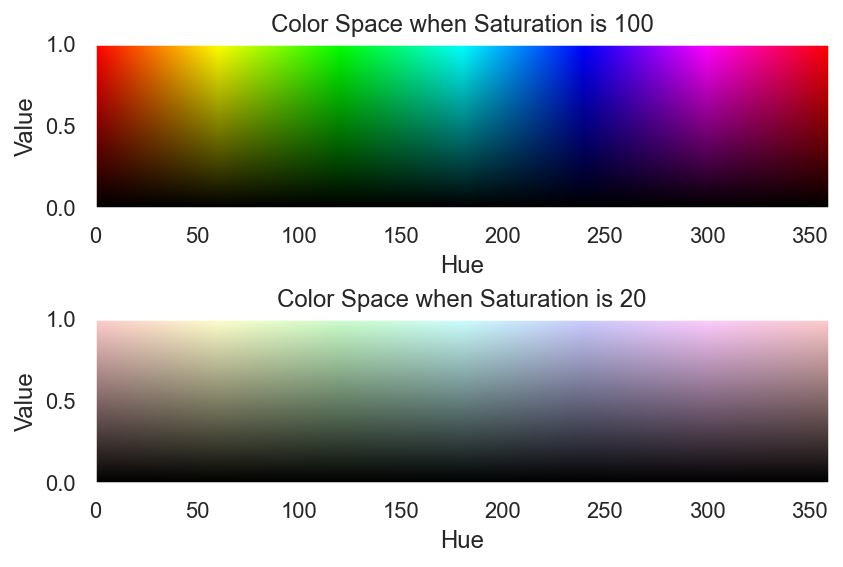

In [33]:
plt.subplot(211)
plt.imshow(RGB_S100, origin="lower", extent=[0, 360, 0, 1], aspect=80)
plt.xlabel("Hue")
plt.ylabel("Value")
plt.title("Color Space when Saturation is 100")
plt.grid(False)

plt.subplot(212)
plt.imshow(RGB_S20, origin="lower", extent=[0, 360, 0, 1], aspect=80)
plt.xlabel("Hue")
plt.ylabel("Value")
plt.title("Color Space when Saturation is 20")
plt.grid(False)

plt.tight_layout()
plt.show()

# 세로축은 명도, 동일한 saturation의 색이여도 위에서 아래로 내려가면 명도가 바뀌는 것. 

matplotlib 패키지의 `rgb_to_hsv`, `hsv_to_rgb` 명령을 사용하면 RGB 색공간 표현과 HSV 색공간 표현을 상호변환할 수 있다.

HSV 색공간으로 표현된 파일은 `imshow` 명령으로 바로 볼 수 없다. 이외에도 RGB, HSV 색공간에  투명도(transparency)를 표현하는 A(Alpha) 채널이 추가된 RGBA, HSVA 등의 색공간도 있다.

이미지를 볼때는, imshow에서 RGB만 보여준다. 

## 이미지 파일 형식

`.bmp` 확장자를 가지는 비트맵(bitmap) 파일은 지금까지 설명한 다차원 배열정보를 그대로 담고있다. 하지만 비트맵 파일은 파일 용량이 크기 때문에 압축을 통해 용량을 줄인 JPG, GIF, PNG 등의 압축 파일 형식도 많이 사용한다. 

* JPEG : JPEG는 Joint Picture Experts Group의 약자로 이미지 압축 기술자 모임인 JPEG 위원회에서 개발한 이미지 파일 형식이다. JPEG 파일은 웹상 및 멀티미디어 환경에서 가장 널리 사용되고 있는 포맷이다. JPG라는 확장자도 같이 사용된다. 
    - 장점
        1. RGB모드와 CMYK모드를 둘 다 지원한다.
        2. RGB 이미지의 모든 컬러 정보를 유지한다.
        3. 이미지를 만드는 사람이 이미지의 질과 파일의 크기를 손실압축방식을 통해 조정할 수 있다.
    - 단점
        1. 투명 이미지(alpha channel)를 지원하지 않는다.
        2. 압축율을 높일 수록 이미지의 질이 손상된다.
        3. 레이어와 알파채널을 지원하지 않는다.
        
* GIF : GIF는 Graphics Interchange Format의 약자로 1987년 미국의 통신업체인 컴퓨서브(Compuserve)에서 개발한 포맷이다. 
    - 장점
        1. 하나의 파일에 여러 비트맵을 저장하여 다중 프레임 애니메이션을 구현 할 수 있다.
        2. 투명 이미지를 지원한다.
        3. 애니메이션을 특별한 플러그인 없이 여러 환경에서 쉽게 적용할 수 있다.
    - 단점
        1. 8비트 256 컬러로 제한된다.

* png : PNG는 Potable Network Graphics의 약자이다. GIF 포맷을 대체하기 위해 개발된 파일 포맷이다. 
    - PNG의 장점
        1. 비손실 압축방식으로 원본에 손상 없이 파일의 크기를 줄여준다.
        2. 이미지의 모든 컬러정보와 알파 채널을 보존하고 있으므로 포토샵에서 활용하기 용이하다.
        3. 문자 혹은 날카로운 경계가 있는 이미지인 경우 JPG보다 PNG가 효과적이다. 
    - PNG의 단점
        1. 애니메이션을 만들 수 없다.
        2. JPG 와 GIF보다 용량이 크다.
        

## Pillow를 이용한 이미지 처리

가장 먼저 소개할 파이썬 이미지 처리 패키지는 Pillow이다. Pillow는 이전에 사용되던 PIL(Python Imaging Library)패키지를 대체하기 위한 것이다. JPEG, BPM, GIF, PNG, PPM, TIFF 등의 다양한 포맷을 지원하고 초보자가 다루기 쉽다는 장점이 있다. 여기에서는 Pillow 버전 5.2를 기준으로 설명한다. PIL 패키지의 대체이므로 임포트 이름이 PIL 패키지와 같다.

In [11]:
import PIL
PIL.__version__

'8.0.1'

### 이미지 읽고 쓰기

우선 인터넷에서 실습을 위한 이미지 파일을 내려받자.

In [12]:
!wget -O logo.png https://www.python.org/static/community_logos/python-logo-master-v3-TM.png

--2021-08-23 20:45:28--  https://www.python.org/static/community_logos/python-logo-master-v3-TM.png
Resolving www.python.org (www.python.org)... 199.232.44.223
Connecting to www.python.org (www.python.org)|199.232.44.223|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83564 (82K) [image/png]
Saving to: ‘logo.png’

logo.png            100%[===================>]  81.61K  --.-KB/s    in 0.02s   

2021-08-23 20:45:28 (4.35 MB/s) - ‘logo.png’ saved [83564/83564]



Pillow 패키지에서 제공하는 `Image` 클래스를 사용하면 여러가지 다양한 포맷의 이미지를 읽고 변환하여 저장할 수 있다. `open` 메서드는 이미지 파일을 열 수 있다.

In [35]:
from PIL import Image


# Load to memory
img_logo_png = Image.open("./logo.png")
img_logo_png.size

(601, 203)

주피터 노트북에서는 `Image` 클래스 객체를 바로 볼 수 있다.

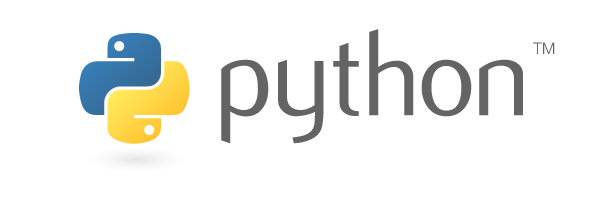

In [36]:
img_logo_png

파일로 저장할 때는 `save` 메서드를 사용한다. 이 때 확장자를 지정하면 해당 이미지 형식으로 자동 변환하여 저장한다.

In [15]:
img_logo_png.save("./logo.bmp")
img_logo_bmp = Image.open("./logo.bmp")

이미지 데이터 처리를 위해 `Image` 클래스 객체를 NumPy 배열로 변환할 때는 `np.array` 함수를 사용한다. NumPy 배열이 되면 matplotlib의 `imshow` 명령으로 볼 수 있다.

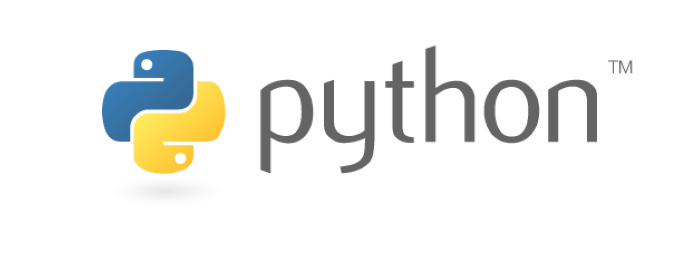

In [16]:
img_logo_array = np.array(img_logo_bmp)

plt.imshow(img_logo_array)
plt.axis("off")
plt.show()

반대로 NumPy 배열을 `Image` 객체로 바꿀 때는 `fromarray` 클래스 메서드를 사용한다.

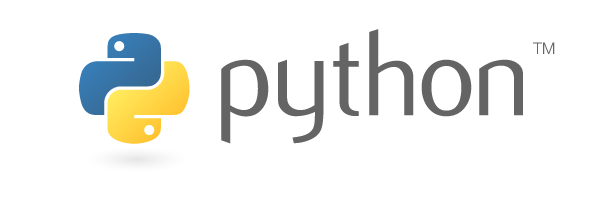

In [17]:
Image.fromarray(img_logo_array)

### 이미지 크기 변환

이미지의 크기를 확대 또는 축소하려면 `resize` 메서드를 사용한다. 인수로는 새로운 사이즈의 튜플을 입력한다.

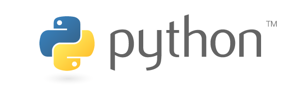

In [18]:
img_logo_png2 = img_logo_png.resize((300, 100))
img_logo_png2

썸네일(thumbnail) 이미지를 만들고 싶다면 `Image`객체의 `thumbnail` 메서드를 사용한다. `resize` 메서드는 원래 객체는 그대로 유지한 채 변환된 이미지를 반환하지만 `thumbnail` 메서드는 원래 객체 자체를 바꾸는 인플레이스(in-place) 메소드이므로 주의하여 사용한다.

thumbnail은 그냥 resize랑 똑같은 것이라고 생각하면 된다. <br>
resize는 원래 이미지를 놔두고, 새로운걸 만들어서 뱉는 거였는데, <br>
thumbnail은 그 자체를 바꿔버리는 것.

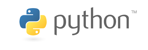

In [19]:
img_logo_thumbnail = img_logo_png.copy()
img_logo_thumbnail.thumbnail((150, 50))
img_logo_thumbnail

### 이미지 회전

이미지를 회전하기 위해서는 `rotate` 메서드를 호출한다. 인수로는 도(degree) 단위의 각도를 입력한다. 입력 각도만큼 반시계 방향으로 회전한다. 

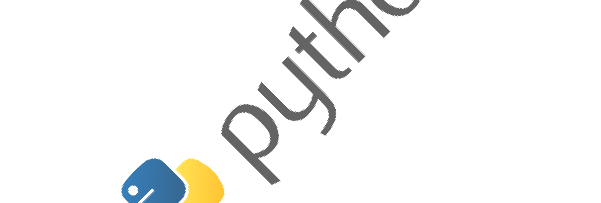

In [20]:
img_logo_rotated = img_logo_png.rotate(45)
img_logo_rotated

### 이미지 잘라내기

`crop` 메서드를 사용하면 이미지에서 우리가 관심이 있는 특정 부분(ROI: region of interest)만 추출 할 수 있다. 인수로 ROI의 좌-상의 좌표, 우-하의 좌표를 받는다. 아래의 코드는 파이썬 로고이미지에서 파이썬의 마크만 잘라낸 것이다. 

(10, 10) -> 좌상단, (200, 200) -> 우하단 <br>
좌상단과 우 하단 입력하면, 이부분만 잘라서 Croping해준다.

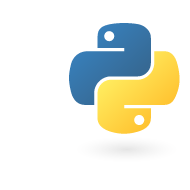

In [21]:
img_logo_cropped = img_logo_png.crop((10, 10, 200, 200))
img_logo_cropped

## Scikit-Image

`scikit-image` 패키지도 이미지 처리에 많이 사용된다. 여기에서는 0.14 버전을 기준으로 설명한다.

사실 open-cv에는 이 모든 기능이 다 있어서 주로 그거 쓴다. 그냥 `Scikit-Image`는 이런 패키지가 있다 정도 알면 된다.

In [37]:
import skimage
skimage.__version__

'0.17.2'

### 샘플 이미지

Scikit-Image는 `data`라는 모듈을 통해 샘플 이미지 데이터를 제공한다. 이미지는 NumPy 배열 자료형으로 사용한다. 

In [38]:
import skimage.data

img_astro = skimage.data.astronaut()
img_astro.shape

(512, 512, 3)

(-0.5, 511.5, 511.5, -0.5)

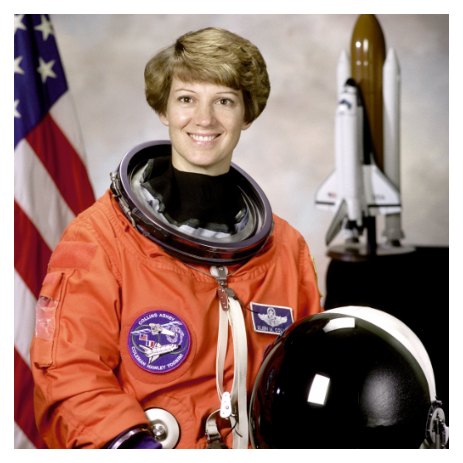

In [41]:
plt.imshow(img_astro)
plt.axis(False)

### 이미지 읽고 쓰기

Scikit-Image 패키지로 이미지를 읽고 쓸 때는 io 서브패키지의 `imsave`, `imread` 명령을 사용한다. 파일 확장자를 지정하면 해당 이미지 형식으로 자동 변환한다.

In [44]:
skimage.io.imsave("astronaut.png", img_astro)
img_astro2 = skimage.io.imread("astronaut.png")

### 색공간 변환

Scikit-Image는 그레이스케일, RGB, HSV 등의 색공간을 변환하는 기능을 color 서브패키지에서 제공한다. 

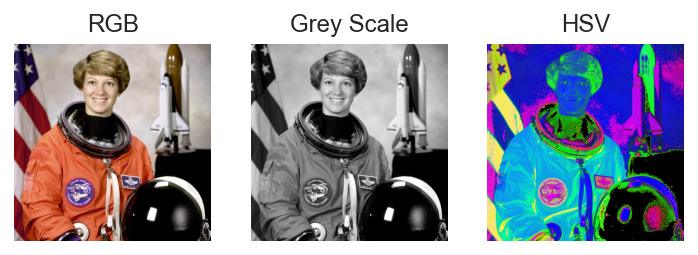

In [46]:
from skimage import color

plt.subplot(131)
plt.imshow(img_astro)
plt.axis("off")
plt.title("RGB")

plt.subplot(132)
plt.imshow(color.rgb2gray(img_astro), cmap=plt.cm.gray)
plt.axis("off")
plt.title("Grey Scale")

plt.subplot(133)
plt.imshow(color.rgb2hsv(img_astro))
plt.axis("off")
plt.title("HSV")

plt.show()

(-0.5, 511.5, 511.5, -0.5)

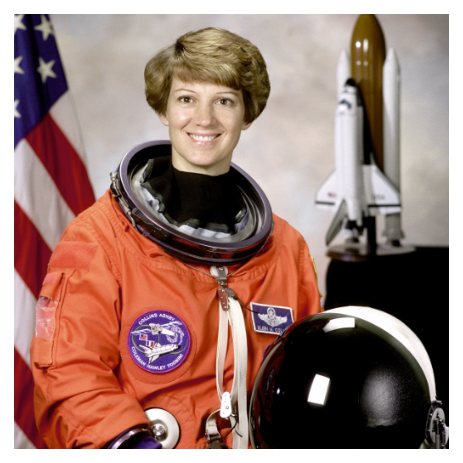

In [52]:
hsv_code = color.rgb2hsv(img_astro)
plt.imshow(hsv_to_rgb(hsv_code))
plt.axis("off")

In [60]:
print(hsv_code.shape)
print(img_astro.shape)

(512, 512, 3)
(512, 512, 3)


In [62]:
print(hsv_code[1][1])
print(img_astro[1][1])

[0.88888889 0.02083333 0.56470588]
[144 141 143]


## OpenCV

OpenCV(Open Source Computer Vision)은 이미지 처리, 컴퓨터 비전을 위한 라이브러리이다.  Windows, Linux, OS X(Mac OS), iOS, Android 등 다양한 플랫폼을 지원한다. 실시간 이미지 프로세싱에 중점을 둔 라이브러리이며 많은 영상처리 알고리즘을 구현해 놓았다. 

추가 기능이 많은데, 라이센스가 open source가 아닌 추가기능이 아니다. <br>
feature-extraction 중 일부 기능은 오픈소스가 아니다. <br>
사용하고 싶으면 따로 다운 받아서 빌드 해야함. 현실적으로 아주 C 전문가가 아닌 이상 불가능하다. <br>
docker를 이용하는게 가장 현실적인 방법

### 설치

OpenCV는 다양한 이미지 특징(feature) 처리 기능을 제공하는데 이 기능은 무료 라이선스가 아니다. 따라서 아니콘다나 pip 명령으로 내려받은 OpenCV 패키지에는 이 기능이 제외되어 있다.

이 기능까지 사용하고 싶은 개인 사용자는 OpenCV 소스코드를 내려받아 직접 컴파일을 해서 사용해야 한다. OpenCV를 컴파일하려면 GNU GCC C/C++ 컴파일러와 CMake 전처리기가 설치되어 있어야 하므로 윈도우나 맥은 빌드하기 까다롭다. 되도록 리눅스 운영체제나 도커를 사용하기를 권장한다.
  
GNU GCC C/C++ 컴파일러와 CMake 전처리기를 설치한 후에는 다음과 같이 OpenCV를 컴파일할 수 있다. 다음은 아나콘다 파이썬 3.7이 설치된 리눅스에서 OpenCV 4.1을 설치하는 스크립트다.


```
export ANACONDA_PATH={아나콘다 폴더 경로. 보통은 ~/anaconda3}
export GPP={GNU GCC g++ 컴파일러 경로. 다른 컴파일러는 불가!}

cd ~
wget https://github.com/opencv/opencv/archive/4.1.0.zip -O opencv.zip
wget https://github.com/opencv/opencv_contrib/archive/4.1.0.zip -O opencv_contrib.zip
unzip opencv.zip
unzip opencv_contrib.zip
mv opencv-4.1.0 opencv
mv opencv_contrib-4.1.0 opencv_contrib
cd opencv
mkdir build
cd build
cmake \
    -D CMAKE_CXX_COMPILER=$GPP \
    -D CMAKE_BUILD_TYPE=RELEASE \
    -D CMAKE_INSTALL_PREFIX=/usr/local \
    -D INSTALL_PYTHON_EXAMPLES=ON \
    -D INSTALL_C_EXAMPLES=OFF \
    -D OPENCV_ENABLE_NONFREE=ON \
    -D OPENCV_EXTRA_MODULES_PATH=~/opencv_contrib/modules \
    -D PYTHON_EXECUTABLE=$ANACONDA_PATH/bin/python \
    -D PYTHON3_EXECUTABLE=$ANACONDA_PATH/bin/python \
    -D PYTHON_INCLUDE_DIR=$ANACONDA_PATH/include/python3.7m \
    -D PYTHON_LIBRARY=$ANACONDA_PATH/lib/libpython3.7m.so \
    -D OPENCV_PYTHON3_INSTALL_PATH=$ANACONDA_PATH/lib/python3.7/site-packages \
    -D BUILD_EXAMPLES=OFF \
    -D BUILD_TESTS=OFF \
    ..
make
make install
ldconfig
```

In [64]:
!pip install opencv-python

     |████████████████████████████████| 42.6 MB 61 kB/s s eta 0:00:01     |██████████████████████████▎     | 35.0 MB 65.4 MB/s eta 0:00:01


빌드된 OpenCV 패키지는 `cv2`라는 이름으로 임포트한다.

In [65]:
import cv2
cv2.__version__

'4.5.3'

### 파일 읽고 쓰기

이미지를 읽을 때는 `imread` 메서드를 사용하는데 인수로 파일이름과 함께 `flag`를 넣을 수 있다.

* `cv2.IMREAD_COLOR`: 이미지 파일을 컬러로 읽어들인다. 투명한 부분은 무시되며, `flag`디폴트 값이다.
* `cv2.IMREAD_GRAYSCALE`: 이미지를 그레이스케일 읽어 들인다. 실제 이미지 처리시 중간단계로 많이 사용한다.
* `cv2.IMREAD_UNCHANGED`: 이미지파일을 알파 채널까지 포함하여 읽어 들인다.

각각 1, 0, -1 로도 표현한다. 

In [67]:
img_astro3 = cv2.imread("./astronaut.png")
img_astro3.shape

# opencv에서는 rgb가 B-G-R순서로 되어 있음. 

(512, 512, 3)

OpenCV도 이미지 데이터를 NumPy 배열로 저장하지만 색 채널의 순서가 R-G-B 순서가 아니라, B-G-R 순서로 뒤바뀌어 있다는 점에 주의한다. 이렇게 만들어진 이유는 OpenCV를 개발하던 초기에는 BGR 색공간이 카메라 제조사나 소프트웨어 개발자들에게 보편적이었기 때문이다. 

In [70]:
img_astro3.shape

(512, 512, 3)

In [ ]:
# 각 채널을 분리
b, g, r = cv2.split(img_astro3)

# b, r을 서로 바꿔서 Merge
img_astro3_rgb = cv2.merge([r, g, b])

`cvtColor` 명령을 사용하면 더 간단하게 색공간을 변환할 수도 있다.

In [72]:
img_astro3_gray = cv2.cvtColor(img_astro3, cv2.COLOR_BGR2GRAY)

이미지 파일을 만들 때는 `imwrite` 명령을 사용한다.

In [ ]:
cv2.imwrite("./gray_astronaut.png", img_astro3_gray)

In [87]:
img_astro3_gray.shape

(512, 512)

### 이미지 크기 변환

`resize()` 명령으로 이미지 크기 변환 기능을 제공한다. 

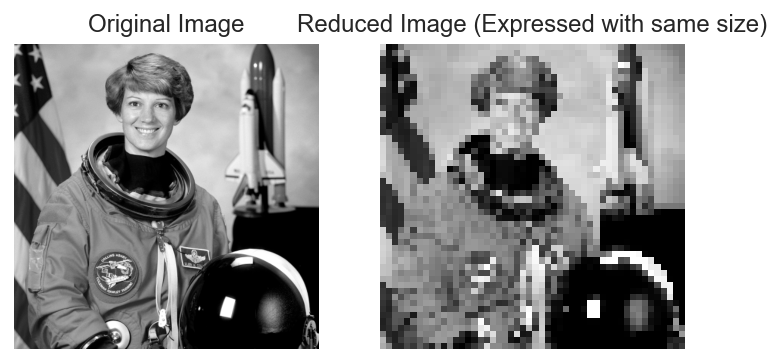

In [74]:
img_astro3_gray_resized = cv2.resize(img_astro3_gray, dsize=(50, 50))
img_astro3_gray_resized.shape

plt.subplot(121)
plt.imshow(img_astro3_gray, cmap=plt.cm.gray)
plt.title("Original Image")
plt.axis("off")

plt.subplot(122)
plt.imshow(img_astro3_gray_resized, cmap=plt.cm.gray)
plt.title("Reduced Image (Expressed with same size)")
plt.axis("off")

plt.show()

# 이미지 필터링

이미지 필터링은 여러 수식을 이용하여 이미지를 이루고 있는 픽셀 행렬을 다른 값으로 바꾸어 이미지를 변형하는 것을 말한다. 

## 임계처리

원래 이미지에는 다양한 색이 있고, 명도에 따라서 0~255 등도 있지. <br>
그것을 딱 0과 1 두가지의 값으로 바꾸겠다는 뜻. 이진화 시키겠다는 것.<br>
기본적으로 흑백으로 되어 있는 이미지만 처리할 수 있다.<br>
흑백은 0-255로 된 값을 갖지. <br>

임계처리(thresholding)는 이미지 행렬에서 하나의 픽셀값을 사용자가 지정한 기준값(threshold)를 사용하여 이진화(binarization)하는 가장 단순한 필터다. OpenCV에서는 `threshold`라는 함수로 구현되어 있다. 인수는 다음과 같다. 

* `threshold(src, thresh, maxval, type)` 
  * `src` : 그레이 스케일 이미지
  * `thresh` : 기준값
  * `maxval` : 기준값을 넘었을 때 적용할 최대값(아무것도 안주면, default 최댓값은 255겠지)
  * `type` : 임계처리 유형 
    * `THRESH_BINARY` : 기준값을 넘으면 최대값 아니면 0
    * `THRESH_BINARY_INV` : 기준값을 넘으면 0 아니면 최대값
    * `THRESH_TRUNC` : 기준값을 넘으면 기준값 아니면 최대값
    * `THRESH_TOZERO` : 기준값을 넘으면 원래값 아니면 0
    * `THRESH_TOZERO_INV` : 기준값을 넘으면 0 아니면 원래값
  

각 임계유형의 결과를 시각화하면 다음과 같다.

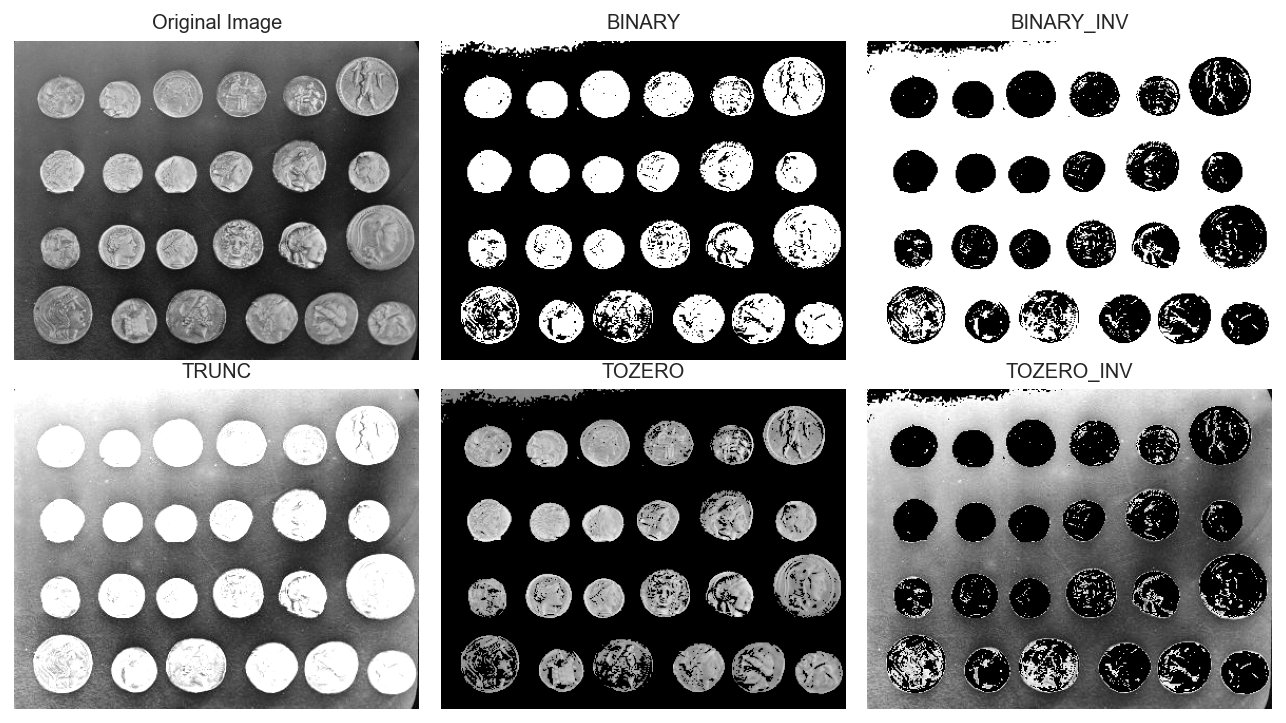

In [80]:
import cv2
from skimage.data import coins

img = coins()

maxval = 255
thresh = maxval / 2

#앞에는 원본이미지가 나와서, _로 버린 것.
_, thresh1 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY_INV)
_, thresh3 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TRUNC)
_, thresh4 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO)
_, thresh5 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(9, 5))
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i], fontdict={'fontsize': 10})
    plt.axis('off')

plt.tight_layout(pad=0.7)
plt.show()

옅은회색은 하얀색을, 진한회색은 검은색으로 되어 가는 과정이지.

In [86]:
img.shape

(303, 384)

(-0.5, 383.5, 302.5, -0.5)

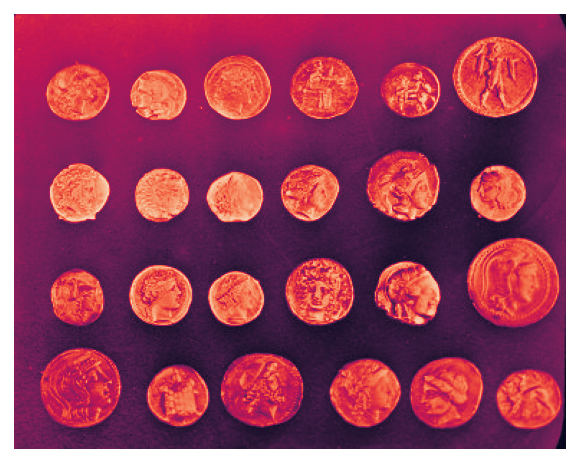

In [78]:
plt.imshow(img)
plt.axis("off")

근데 이런건 왜하는걸까? 컨투어링이라는 것을 하면서 경계선을 추출하는데, 그냥 희미하게 있으면 경계선을 추출하기가 어려움. 그래서, 하얀건 확 하얗게, 어두운건 확 어둡게 해줘야 추출이 쉽겠지. 이게 thresholding의 목적

## 적응임계처리

임계처리의 문제점이, 0-255 중간에 선을 딱 그려놓고 그보다 위는 무조건 흰색, 아래는 무조건 검은색으로 만들잖아. 극과 극으로 밀어넣어<br>
이게 우리가 복사 하다 보면, 아래와 같은 경우 많아. 종이부분은 진짜 하얗게 만들어야되는데 첫줄 두번째 사진처럼 되버리지. <br>
그러면, 원본 이미지에서 왼쪽 부분은 기준을 좀더 높게, 오른쪽 부분에서는 기준을 좀더 낮게 잡아야 돼. <br>
위치마다 기준값을 사람이 딱 정해놓는게 아니라 자동으로 정하는 방법이 없을까? <br>
그래서 만든것이 적응임계처리<br><br>

다 알 순 없지만, 기본적인 방법은 평균을 이용하는 것. <br>
특정 작은 영역을 딱 잡고, 그 영역의 평균값을 threshold로 쓰게 되는 것. 아니면, 뭐 가우시안블러를 한번 잡고 나서 평균값을 구해서 걔를 기준으로 쓰던가. 방법은 다양하다. 이렇게 해놓고 보면, 글자를 읽는 작업 등을 할때 훨씬 더 잘 읽히겠지. 



![1_37.png](./materials/1_37.png)

임계처리의 경우는 이미지 전체에 하나의 기준값을 적용한다. 적응임계처리는 일정한 영역 내의 이웃한 픽셀들의 값들을 이용하여 해당 영역에 적용할 기준값을 자체적으로 계산한다. OpenCV에서는 `adaptiveThreshold` 함수로 구현되어 있다. 

* `adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)` 
  * `src` : 그레이스케일 이미지
  * `maxValue` – 기준값을 넘었을 때 적용할 값
  * `adaptiveMethod` : 영역 내에서 기준값을 계산하는 방법. 
    * `ADAPTIVE_THRESH_MEAN_C`: 영역 내의 평균값에 C를 뺀 값을 기준값으로 사용
    * `ADAPTIVE_THRESH_GAUSSIAN_C`: 영역에 추후 설명할 가우시안 블러를 적용한 후 C를 뺀 값을 기준값으로 사용
  * `thresholdType` : 임계처리 유형
    * `THRESH_BINARY`
    * `THRESH_BINARY_INV`
  * `blockSize` : 임계처리를 적용할 영역의 크기
  * `C` : 평균이나 가중평균에서 차감할 값


In [ ]:
from skimage.data import page

img = page()

maxval = 255
thresh = 126
ret, th1 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)

k = 15
C = 20

th2 = cv2.adaptiveThreshold(
    img, maxval, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, k, C)
th3 = cv2.adaptiveThreshold(
    img, maxval, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, k, C)

images = [img, th1, th2, th3]
titles = ['원본이미지', '임계처리', '평균 적응임계처리', '가우시안블러 적응임계처리']

plt.figure(figsize=(8, 5))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

## 이미지 필터링

이미지 필터링(image filtering)은 필터(filter) 또는 커널(kernel) 또는 윈도우(window)라고 하는 정방행렬을 정의하고 이 커널을 이동시키면서 같은 이미지 영역과 곱하여 그 결과값을 이미지의 해당 위치의 값으로 하는 새로운 이미지를 만드는 연산이다. 기호 $\otimes$로 표기한다.

원본 이미지의 $(x,y)$ 위치의 명도를 $f(x,y)$, 필터 이미지를 $h(x,y)$, 필터링된 결과를 $g(x,y)$라고 하면 수식으로 다음과 같다.

$$ f \otimes h = \sum_{u=-K/2}^{K} \sum_{v=-K/2}^{K} f(x + u, y + v) \cdot h(u, v) $$

이 식에서 $K$는 필터 크기의 절반을 뜻한다. 예를 들어 $3\times 3$ 크기의 필터에서는 $K=1$이다. 위 식을 줄여서 다음처럼 나타내기도 한다. $W$S는 윈도우 영역을 뜻한다.

$$ f \otimes h = \sum_{W} f(x + u, y + v) \cdot h(u, v) $$

위 식에서 필터를 좌우 상하로 뒤집으면 콘볼루션(convolution)이라고 한다. 기호 $*$로 표기한다.


$$ f * h = f \otimes \tilde{h} = \sum_{W} f(x - u, y - v) \cdot \tilde{h}(u, v) $$

$$ \tilde{h}(u, v) = h(-u, -v) $$

openCV에서는 `filter2D` 함수를 사용한다


`filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])`

* `src`: 이미지
* `ddepth`: 이미지 깊이(자료형 크기). -1이면 입력과 동일
* `kernel`: 커널 행렬


다음 코드는 평균을 구하는 커널 적용한 예다. 커널 크기가 커지면서 이미지가 점점 더 흐려지는 것을 볼 수 있다. 

In [ ]:
import cv2
from skimage.data import astronaut

img = astronaut()
img = cv2.resize(img, dsize=(150, 150))

plt.figure(figsize=(8, 3))
for i, k in enumerate([2, 6, 11]):
    kernel = np.ones((k, k)) / k**2
    filtering = cv2.filter2D(img, -1, kernel)
    plt.subplot(1, 3, i + 1)
    plt.imshow(filtering)
    plt.title("커널 사이즈 {}".format(k))
    plt.axis("off")

plt.show()

## 블러

블러는 이미지 필터링을 사용하여 이미지를 흐리게 만드는 것을 말한다. 노이즈를 제거하거나 경계선을 흐리게 하기 위해 쓴다. 다음과 같은 방법이 있다.

* 평균 블러
* 중앙값 블러
* 가우시안 블러
* 양방향 블러

### 평균 블러

평균 블러 방법은 균일한 값을 가지는 커널을 이용한 이미지 필터링이다. 따라서 커널 영역내의 평균값으로 해당 픽셀을 대체한다. OpenCV에서는 `blur` 함수로 구현되어 있다.

`blur(src, ksize)`

* `src`: 원본 이미지
* `ksize`: 커널 크기

In [ ]:
blur = cv2.blur(img, (5, 5))
boxfilter = cv2.boxFilter(img, -1, (5, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("원본 이미지")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(blur)
plt.title("blur 함수 적용")
plt.axis('off')

plt.tight_layout()
plt.show()

### 중앙값 블러 

중앙값 블러는 평균이 아닌 중앙값으로 해당 픽셀을 대체한다. 이 필터링 방법은 점 모양의 잡음을 제거하는데 효과적이다. OpenCV에서는 `medianBlur` 함수를 사용한다.

`medianBlur(src, ksize)`

* `src`: 원본 이미지
* `ksize`: 커널 크기

In [ ]:

# 점 잡음 적용
img_noise = img.copy()

np.random.seed(0)
N = 500
idx1 = np.random.randint(img.shape[0], size=N)
idx2 = np.random.randint(img.shape[1], size=N)
img_noise[idx1, idx2] = 255

# 중앙값 블러로 잡음 제거
img_denoise = cv2.medianBlur(img_noise, 3)

plt.subplot(1, 2, 1)
plt.imshow(img_noise)
plt.title("점 잡음이 있는 이미지")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_denoise)
plt.title("중앙값 블러를 적용한 이미지")
plt.axis('off')
plt.show()

### 가우시안 블러

가우시안 블러는  가우시안 함수 $G$를 커널로 사용한다. 가우시안 커널은 중앙 위치 $(x,y)$와 커널 위치 $(x+u, y+v)$의 거리 차이 $(u,v)$가 클수록 가중치가 작아진다. 

$$ f \otimes G = \sum_{W} f(x + u, y + v) \cdot G(u, v) = \sum_{W} f(x + u, y + v) \cdot G((x+u)-x, (y+v)-y) $$


In [ ]:
gauss1d = cv2.getGaussianKernel(100, 15)
gauss2d = gauss1d @ gauss1d.T

plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.plot(gauss1d)
plt.grid(False)
plt.title("1차원 가우스 커널")

plt.subplot(122)
plt.imshow(gauss2d, cmap=mpl.cm.bone_r)
plt.grid(False)
plt.title("2차원 가우스 커널")

plt.tight_layout()
plt.show()

OpenCV에서는 `GaussianBlur` 함수로 구현되어 있다.

`GaussianBlur(src, ksize, sigmaX)`

* `src`: 원본 이미지
* `ksize`: 커널 크기
* `sigmaX`: 표준편차


In [ ]:
# 백색 잡음
img_noise = np.clip((img / 255 + np.random.normal(scale=0.1, size=img.shape)) * 255, 0, 255).astype('uint8')

# 가우시안 블러로 잡음 제거
img_denoise = cv2.GaussianBlur(img_noise, (9, 9), 2)

plt.subplot(1, 2, 1)
plt.imshow(img_noise)
plt.title("백색노이즈가 있는 이미지")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_denoise)
plt.title("가우시안 필터링을 적용한 이미지")
plt.axis('off')

plt.show()

### 양방향 필터링

가우시안 필터링을 쓰면 이미지의 경계선도 흐려진다. 양방향 필터링(Bilateral Filtering)은 두 픽셀과의 거리 뿐 아니라 두 픽셀의 명암값의 차이도 커널에 넣어서 가중치로 곱한다. 

* 일반 이미지 필터링

$$ f \otimes G = \sum_{W} f(x + u, y + v) \cdot G((x+u)-x, (y+v)-y) $$

* 양방향 이미지 필터링

$$ f \otimes G = \sum_{W} f(x + u, y + v) \cdot G((x+u)-x, (y+v)-y) \cdot G'(f(x+u)-f(x), f(y+v)-f(y)) $$


따라서 픽셀값의 차이가 너무 크면 가중치가 0에 가까운 값이 되어 합쳐지지 않으므로 영역과 영역사이의 경계선이 잘 보존된다.

OpenCV에서는 `bilateralFilter` 함수로 구현되어 있다.


`bilateralFilter(src, d, sigmaColor, sigmaSpace)`

* `src`: 원본 이미지
* `d`: 커널 크기
* `sigmaColor`: 색공간 표준편차. 값이 크면 색이 많이 달라도 픽셀들이 서로 영향을 미친다.
* `sigmaSpace`: 거리공간 표준편차. 값이 크면 멀리 떨어져있는 픽셀들이 서로 영향을 미친다.

In [ ]:
img_denoise1 = cv2.GaussianBlur(img_noise, (9, 9), 2)
img_denoise2 = cv2.bilateralFilter(img_noise, 9, 75, 75)

plt.subplot(1, 2, 1)
plt.imshow(img_denoise1)
plt.title("가우시안 필터링을 적용한 이미지")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_denoise2)
plt.title("양방향 필터링을 적용한 이미지")
plt.axis('off')

plt.show()

## 형태학적 변환 

이진화한 이미지에서는 같은 값을 가진 픽셀이 이웃하여 있으면 이를 형태학적 영역(morphological region)으로 생각할 수 있다.
이미지의 형태학적 변환(morphological transformation)은 이미지 필터링을 사용하여 영역을 변화시키는 방법이다.

변환에 적용할 커널은 `getStructuringElement` 함수로 생성한다. 

`getStructuringElement(shape, ksize)`

* `shape`: 커널 모양
  * `cv2.MORPH_RECT`: 사각형 
  * `cv2.MORPH_ELLIPSE`: 타원형 
  * `cv2.TMORPH_CROSS`: 십자
* `ksize`: 커널 크기

In [ ]:
cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

In [ ]:
cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

In [ ]:
cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

### 침식 기법

침식 기법은 각 픽셀에 커널을 적용하여 커널 영역 내의 최솟값으로 해당 픽셀을 대체한다. 이진화된 이미지에서는 0인 영역이 증가한다. 

OpenCV에서는 `erode`함수로 구현되어 있다. 

`erode(src, kernel)`

* `src`: 원본 이미지
* `kernel`: 커널


다음 코드는 이미지를 여러 커널 모양을 이용하여 침식 기법으로 변환한다. 검은색이 0인 영역, 흰색이 1인 영역이다. 검은색(0)이 흰색을 침식해 들어가는 것을 알 수 있다.

In [ ]:
from skimage.data import horse

img = horse().astype('uint8')
img = np.ones(img.shape) - img

ksize = (20, 20)
kernel = {}
kernel[0] = cv2.getStructuringElement(cv2.MORPH_RECT, ksize)
kernel[1] = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize)
kernel[2] = cv2.getStructuringElement(cv2.MORPH_CROSS, ksize)
title = ["사각형 커널", "타원 커널", "십자가 커널"]

plt.subplot(2, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("원본 이미지")
plt.axis('off')
for i in range(3):
    erosion = cv2.erode(img, kernel[i])
    plt.subplot(2, 2, i+2)
    plt.imshow(erosion, cmap='bone')
    plt.title(title[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

### 팽창

팽창(Dilation)은 침식과 반대로 커널 영역내의 최댓값으로 해당 픽셀을 대체하는 것이다. OpenCV에서는  `dilate` 함수로 구현되어 있다.


`dilate(src, kernel)`

* `src`: 원본 이미지
* `kernel`: 커널


In [ ]:
plt.subplot(2, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("원본 이미지")
plt.axis('off')
for i in range(3):
    erosion = cv2.dilate(img, kernel[i])
    plt.subplot(2, 2, i+2)
    plt.imshow(erosion, cmap='bone')
    plt.title(title[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

### 그레디언트, 오프닝, 클로징

그레디언트는 팽창으로 확장시킨 영역에서 침식으로 축소시킨 영역을 빼서 윤곽선을 파악하는 것이다. 

이와 유사한 기법으로 오프닝(Opening)과 클로징(Closing)이 있다. 오프닝은 침식을 적용한 뒤 팽창을 적용하는 것으로 영역이 점점 둥글게 되므로 점 잡음, 작은 물체, 돌기 등을 제거하는데 적합하다. 클로징은 반대로 팽창을 적용한 뒤 침식을 적용하여 영역이 영역이 붙기 때문에 전체적인 윤곽을 파악하는데 적합하다.

그레디언트를 구하려면 OpenCV의 `morphologyEx` 라는 함수를 사용한다. 

`morphologyEx(src, op, kernel)`

* `src`: 원본 이미지
* `op`: 
  * `cv2.MORPH_OPEN`: `cv2.dilate(cv2.erode(image))`
  * `cv2.MORPH_CLOSE`: `cv2.erode(cv2.dilate(image))`
  * `cv2.MORPH_GRADIENT`: `cv2.dilate(image) - cv2.erode(image)`
  * `cv2.MORPH_TOPHAT`: `image - opening(image)`
  * `cv2.MORPH_BLACKHAT`: `image - closing(image)`
* `kernel`: 커널


In [ ]:
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, 
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))
)

closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, 
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))
)

gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, 
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
)

images = [img, gradient, opening, closing]
titles = ["원본 이미지", 'Gradient', 'Opening', 'Closing']

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#### 연습 문제 1

다음 왼쪽 이미지를 필터링 처리하여 오른쪽 이미지와 같이 종이 부분만을 이진화하여라.
이미지는 다음 명령으로 내려받는다.

```
!wget https://datascienceschool.net/upfiles/63a2990218f1487b8e0dfd4dac8f3a5e.png -O receipt.png
```

<img src="https://datascienceschool.net/upfiles/bf701e2bc70141478cafe3c9b2b9f032.png">